<a href="https://www.kaggle.com/code/jimschacko/medical-insurance-premium-using-lr-rfr?scriptVersionId=118113909" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('/kaggle/input/insurance/insurance.csv')

In [3]:
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
dataset.shape

(1338, 7)

In [6]:
dataset.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [7]:
dataset.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
dataset.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [9]:
dataset = pd.get_dummies(dataset, drop_first = True)

In [10]:
dataset

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [11]:
dataset_2 = dataset.drop(columns = 'charges')

<AxesSubplot:title={'center':'Correlation'}>

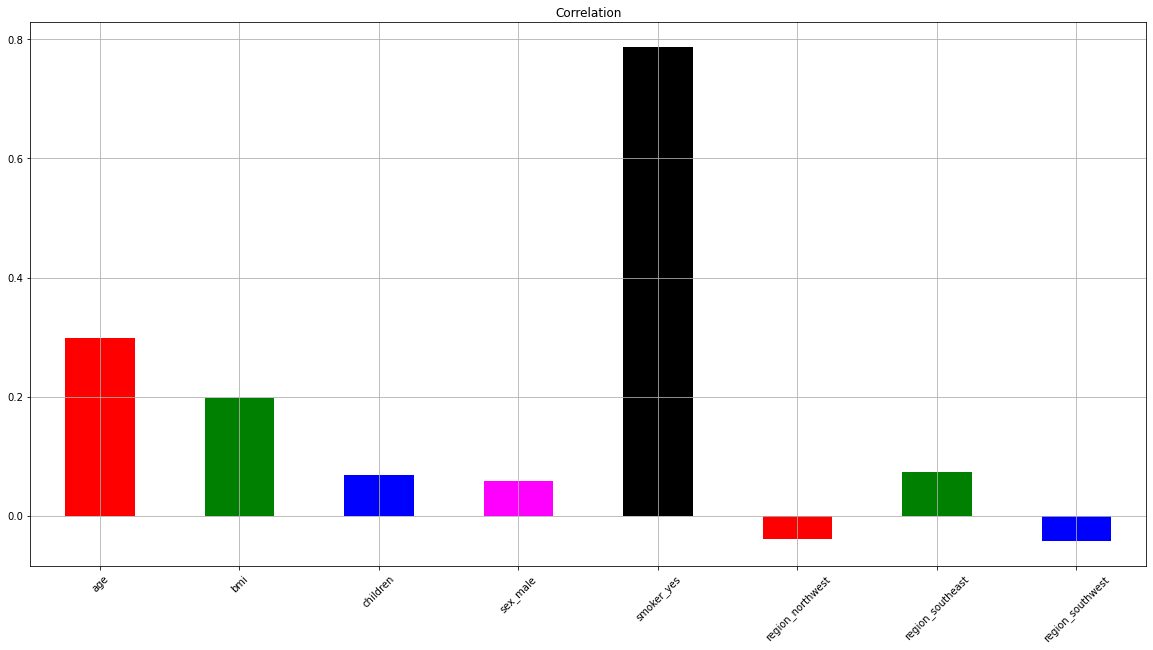

In [12]:
co = ['red','green','blue','magenta','black']
dataset_2.corrwith(dataset['charges']).plot.bar(figsize = (20,10), title = 'Correlation', rot = 45, grid = True, color = co)

In [13]:
corr = dataset.corr()

In [14]:
corr

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251,-0.039905,0.073982,-0.043210
sex_male,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185,-0.011156,0.017117,-0.004184
smoker_yes,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000,-0.036945,0.068498,-0.036945
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.011156,-0.036945,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.270025,-0.023066,0.073982,0.017117,0.068498,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.006205,0.021914,-0.043210,-0.004184,-0.036945,-0.320829,-0.346265,1.000000


<AxesSubplot:>

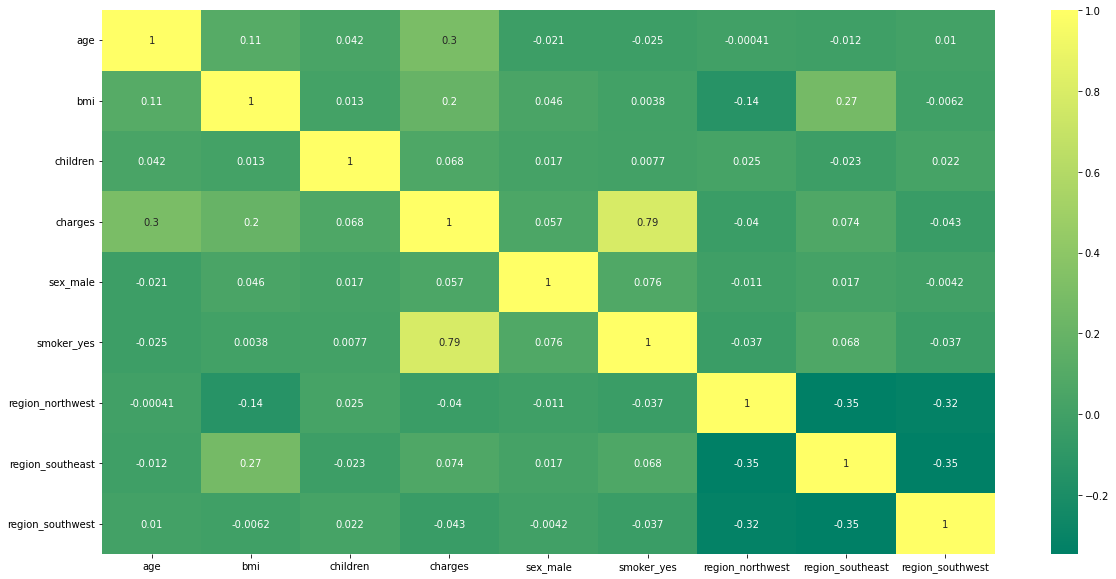

In [15]:
plt.figure(figsize = (20,10))
sns.heatmap(corr, annot = True, cmap = 'summer')

<AxesSubplot:xlabel='bmi', ylabel='Count'>

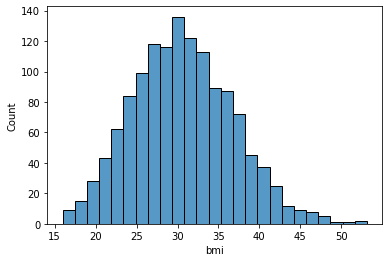

In [16]:
sns.histplot(dataset['bmi'])

<AxesSubplot:xlabel='age', ylabel='Count'>

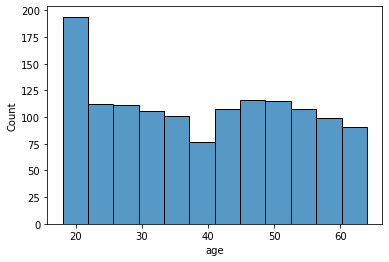

In [17]:
sns.histplot(dataset['age'])

<AxesSubplot:xlabel='children', ylabel='Count'>

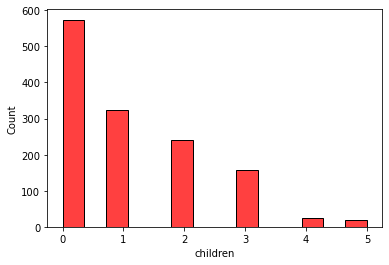

In [18]:

sns.histplot(dataset['children'], color = 'red')

<Figure size 1440x720 with 0 Axes>

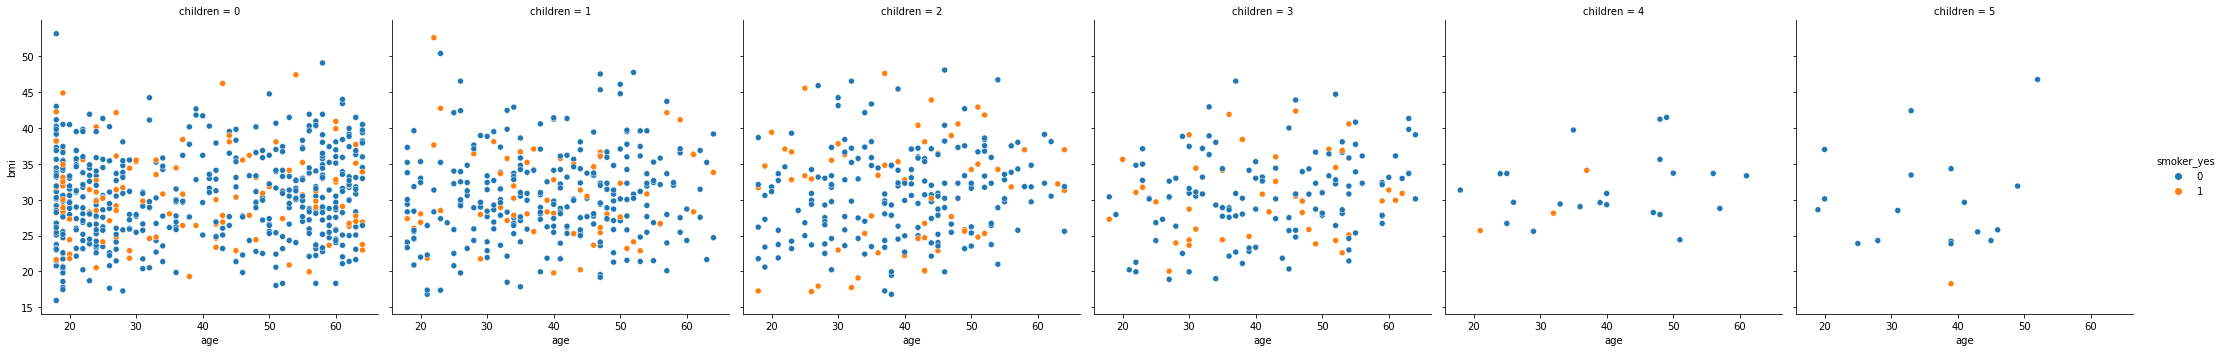

In [19]:
plt.figure(figsize = (20,10))
sns.relplot(data = dataset, x = 'age' , y= 'bmi' , hue = 'smoker_yes', col = 'children')

<AxesSubplot:xlabel='age', ylabel='bmi'>

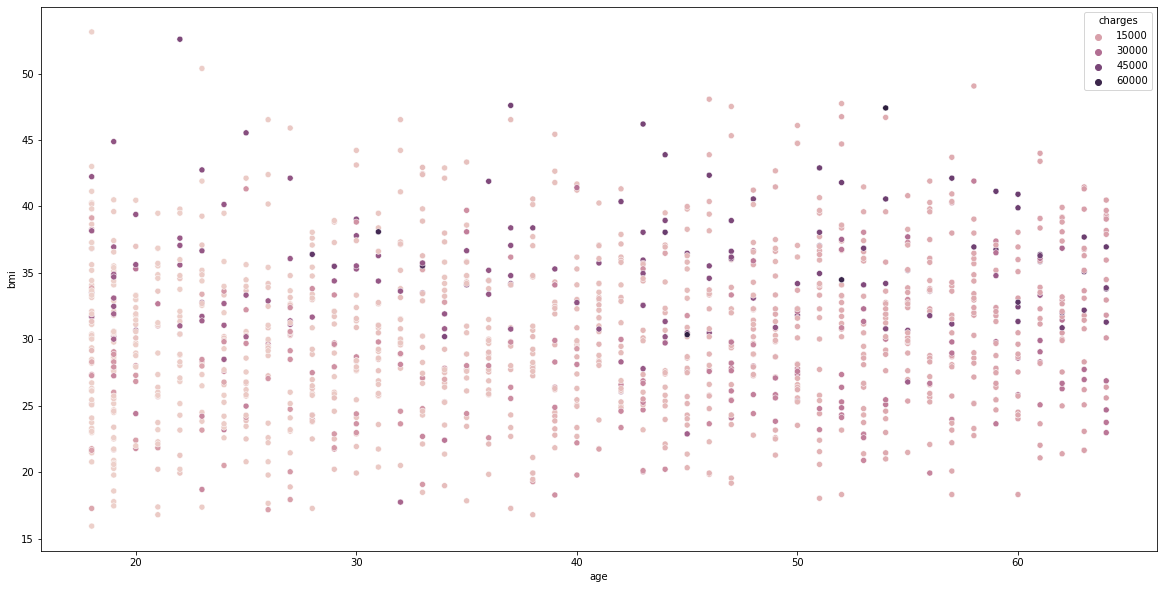

In [20]:
plt.figure(figsize = (20,10))
sns.scatterplot(data = dataset, x = 'age' , y= 'bmi' , hue = 'charges')

In [21]:
#splitting the dataset
x= dataset.drop(columns = ['charges'])

In [22]:
y = dataset['charges']

In [23]:
x

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,1,0,0
1334,18,31.920,0,0,0,0,0,0
1335,18,36.850,0,0,0,0,1,0
1336,21,25.800,0,0,0,0,0,1


In [24]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.33, random_state = 45)

In [26]:
x_train

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
964,52,36.765,2,1,0,1,0,0
732,24,30.100,3,0,0,0,0,1
904,60,35.100,0,0,0,0,0,1
984,20,30.115,5,1,0,0,0,0
109,63,35.090,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...
580,59,25.460,1,1,0,0,0,0
163,32,29.800,2,0,0,0,0,1
607,59,23.655,0,0,1,1,0,0
414,19,35.150,0,0,0,1,0,0


In [27]:
x_test

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
910,22,28.310,1,1,0,1,0,0
823,44,29.810,2,0,0,0,1,0
677,60,31.350,3,1,1,1,0,0
559,19,35.530,0,1,0,1,0,0
1169,37,34.105,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...
321,26,29.640,4,0,0,0,0,0
996,39,34.100,3,0,0,0,0,1
1337,61,29.070,0,0,1,1,0,0
549,43,46.200,0,0,1,0,1,0


In [28]:
y_train

964    26467.09737
732     4234.92700
904    12644.58900
984     4915.05985
109    47055.53210
          ...     
580    12913.99240
163     5152.13400
607    25678.77845
414     2134.90150
971     4992.37640
Name: charges, Length: 896, dtype: float64

In [29]:
y_test

910      2639.04290
823      8219.20390
677     46130.52650
559      1646.42970
1169     6112.35295
           ...     
321     24671.66334
996      7418.52200
1337    29141.36030
549     45863.20500
682     40103.89000
Name: charges, Length: 442, dtype: float64

In [30]:
#Model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression()

In [31]:
y_pred = linreg.predict(x_test)

In [32]:
y_pred

array([ 3401.92625067,  9593.94109627, 39617.36337419,  4537.94106305,
        9109.41608442, 14107.02262796,  4392.95317074, 15270.60693669,
       10878.77885054, 34642.95726608,  5745.84294805, 12209.14402146,
        8585.18041657,  8745.10176395, 10841.05633704,  7173.06461596,
        1325.24550738,  7317.69289547,  7649.00206551, 12208.39283933,
        8458.90034196, 33768.6113993 , 15850.03611847, 31556.55858531,
       12586.5460643 , 17092.01459432, 30725.77089449, 10457.7964297 ,
        4306.67000114, 14112.94447438,  8139.74181033, 13184.66563656,
        7061.45282832,  3360.78970339, 11341.6147255 ,  6139.19324646,
        5111.88200964, 12741.25735036, 38113.36770757,  9956.88314634,
       35658.19752315,   820.07822061,  8587.85313803,  9130.49497792,
        4402.7562499 ,  8128.60536125,  8921.06862059, 13360.67508858,
       13082.74136126, 12158.89120057,  3771.76692336, 39136.33870004,
       10486.18818473, 19241.66470999, 15737.77470618, 12998.61608077,
      

In [33]:
from sklearn.metrics import r2_score
result = r2_score(y_test,y_pred)
result1 = pd.DataFrame([['Linear Regression', result]],
               columns = ['Model', 'Accuracy'])
result1

,Model,Accuracy
0,Linear Regression,0.719483


In [34]:
#random forest 
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor()
rfc.fit(x_train,y_train)

RandomForestRegressor()

In [35]:
y_pred = rfc.predict(x_test)
from sklearn.metrics import r2_score
result2 = r2_score(y_test,y_pred)

In [36]:
model_results = pd.DataFrame([['Random Forest', result2]],
               columns = ['Model','Accuracy'])
model_results

,Model,Accuracy
0,Random Forest,0.829151


In [37]:
result = result1.append(model_results)
result

,Model,Accuracy
0,Linear Regression,0.719483
0,Random Forest,0.829151


In [38]:
#single observation for medical premium
dataset

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [39]:
obs = [[24,29.25,0,0,0,0,0,0]]
rfc.predict(obs)

array([4309.42172468])

The person has to pay a premium of 3999 for his age 24 being a non smoker, living in northeast region and having no children.